<a href="https://colab.research.google.com/github/larissa-rangel/MO443-processamento-de-imagem-digital/blob/main/MO443_T1_Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.7 Planos de Bits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Importando todas as bibliotecas necessárias
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(512, 512) uint8
230 0


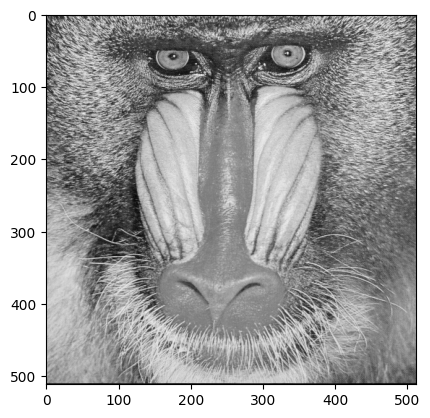

In [ ]:
A = io.imread('/content/drive/MyDrive/Testes/baboon.png')#Carregando a imagem da pasta no drive e armazenando em uma matriz np.array
print(A.shape, A.dtype)#Imprimir as dimensões da matriz que contém os dados da imagem
print(A.max(),A.min()) #Imprimir o valor máximo e mínimo da matriz que contém os dados da imagem
plt.imshow(A,cmap='gray')#Exibir os dados da matriz como uma imagem em  RGB
plt.show()#Exibir a figura aberta

In [ ]:
B = np.zeros((len(A),len(A),4)) #inicializa com zeros uma matriz B de 4 dimensões, onde serão armazenadas os planos de bits
for i in range(A.shape[0]):  #Este laço percorre cada elemento de A e salva a representação binária na matriz B.
    for j in range(A.shape[1]):
       B[i,j,0] = np.binary_repr(A[i][j] ,width=8) # np.binary_repr: Retorna a representação binária do número de entrada como uma string de tamanho 8 e salva na dimensão B[...,0]
       B[i,j,1] = int(format(A[i,j],'08b')[0])#MSB: salva o primeiro elemento da representação em string ex: A[0,0] = 10001110 -> B[0,0,1] = 1
       B[i,j,2] = int(format(A[i,j],'08b')[3])#Meio: salva o quarto elemento da representação em string ex: A[0,0] = 10001110 -> B[0,0,2] = 0
       B[i,j,3] = int(format(A[i,j],'08b')[7])#LSB: salva o último elemento da representação em string ex: A[0,0] = 10001110 -> B[0,0,3] = 0


(512, 512) uint8
137 0


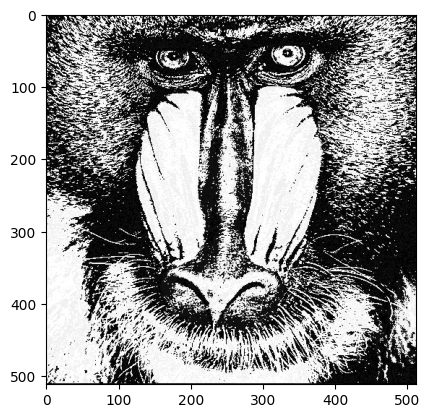

In [ ]:
reconstructed_img = ((B[...,1]*2**(7))+(B[...,2]*2**(3))+(B[...,3]*2**(0))).astype(np.uint8) #Reconstrução da imagem original
print(reconstructed_img.shape, reconstructed_img.dtype)#Imprimir as dimensões da matriz que contém os dados da imagem
print(reconstructed_img.max(),reconstructed_img.min()) #Imprimir o valor máximo e mínimo da matriz que contém os dados da imagem
plt.imshow(reconstructed_img,cmap='gray')#Exibir os dados da matriz como uma imagem em  RGB
plt.show()#Exibir a figura aberta

Text(0.5, 1.0, 'Plano de bits 0')

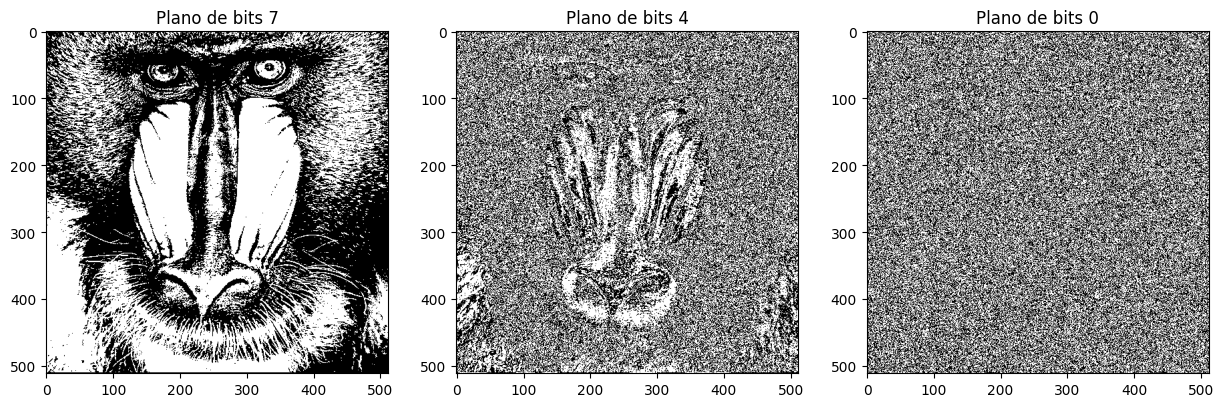

In [ ]:
fig = plt.figure(figsize=(15,15))#Criando uma nova figura
rows = 1 #linhas
columns = 3 # colunas
fig.add_subplot(rows, columns,1) #Adicionando um eixo de uma linha e 3 colunas para plotar as imagens juntas na mesma figura
plt.imshow(B[...,1],cmap='gray')
plt.title("Plano de bits 7")
fig.add_subplot(rows, columns, 2)
plt.imshow(B[...,2],cmap='gray')
plt.title("Plano de bits 4")
fig.add_subplot(rows, columns, 3)
plt.imshow(B[...,3],cmap='gray')
plt.title("Plano de bits 0")